In [48]:
#uses lstm 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [49]:
!pip install yfinance --upgrade --no-cache-dir

In [50]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
df = pdr.get_data_yahoo("AAPL", start="2011-01-01", end="2020-04-30")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,11.630000,11.795000,11.601429,11.770357,10.091494,445138400
2011-01-04,11.872857,11.875000,11.719643,11.831786,10.144161,309080800
2011-01-05,11.769643,11.940714,11.767857,11.928571,10.227139,255519600
2011-01-06,11.954286,11.973214,11.889286,11.918929,10.218876,300428800
2011-01-07,11.928214,12.012500,11.853571,12.004286,10.292055,311931200
...,...,...,...,...,...,...
2020-04-23,68.967499,70.437500,68.717499,68.757500,67.911903,124814400
2020-04-24,69.300003,70.752502,69.250000,70.742500,69.872513,126161200
2020-04-27,70.449997,71.135002,69.987503,70.792503,69.921890,117087600


In [51]:
df.shape

(2346, 6)

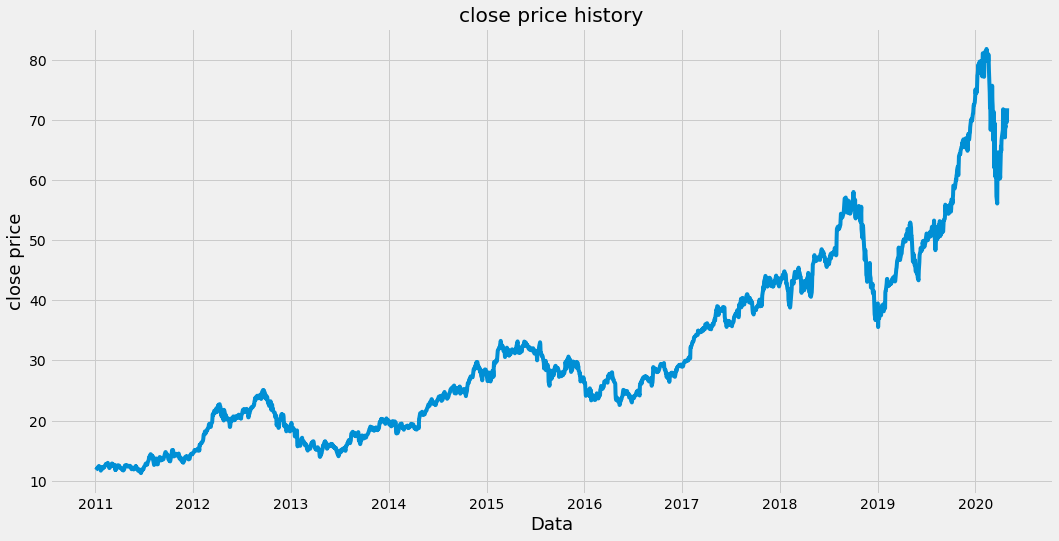

In [52]:
#visualize closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Data',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.show()

In [53]:
df['Close'].max()

81.80000305175781

In [54]:
std=[]
for i in range(1,len(df['Close'])):
    std.append(df['Close'][i]-df['Close'][i-1])
std=np.array(std)    

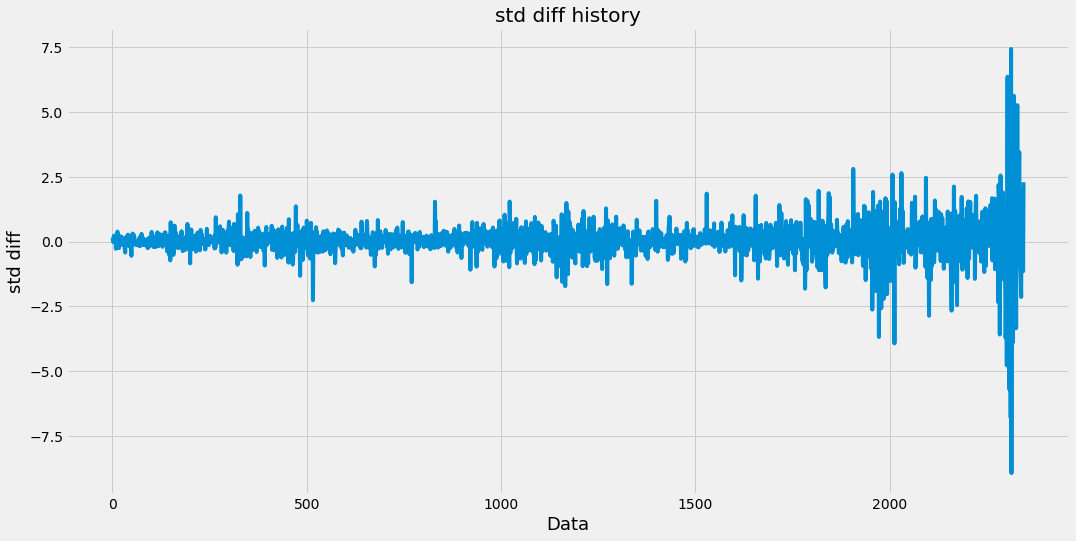

In [55]:
#visualize standard difference price history
plt.figure(figsize=(16,8))
plt.title('std diff history')
plt.plot(std)
plt.xlabel('Data',fontsize=18)
plt.ylabel('std diff',fontsize=18)
plt.show()

In [56]:
#create a dataframe with close column
data=df.filter(['Close']) 
#convert to numpy array
dataset=data.values
#get the number of rows to train model taking 80./.
trainingdata=math.ceil(len(data)*0.8)
trainingdata

1877

In [57]:
#scale the data
scale=MinMaxScaler(feature_range=(0,1))
scaled_data=scale.fit_transform(dataset)
scaled_data

array([[0.00721489],
       [0.00808575],
       [0.00945783],
       ...,
       [0.84395064],
       [0.82768285],
       [0.860112  ]])

In [58]:
#create the training data set
#create the scaled train dataset
trainset=scaled_data[0:trainingdata,:]
x_train=[]
y_train=[]
for i in range(60,len(trainset)):
  x_train.append(trainset[i-60:i,0])   #only 60 values
  y_train.append(trainset[i,0]) 
  if i<=60:
    print(x_train)
    print(y_train) 
    print()       

[array([0.00721489, 0.00808575, 0.00945783, 0.00932114, 0.01053122,
       0.01373615, 0.01332605, 0.01473357, 0.01537152, 0.01678918,
       0.01282479, 0.01190838, 0.00878952, 0.00577191, 0.01120462,
       0.01320452, 0.01444498, 0.01412094, 0.01052108, 0.0121514 ,
       0.01504243, 0.01468295, 0.01423739, 0.0157867 , 0.01851065,
       0.02019158, 0.02169026, 0.01985742, 0.021027  , 0.02220669,
       0.02257123, 0.02420662, 0.02176114, 0.01784232, 0.01179192,
       0.01382223, 0.01395386, 0.01662718, 0.01918403, 0.01720942,
       0.01863215, 0.02239909, 0.02262187, 0.0202726 , 0.02047511,
       0.01880936, 0.01587277, 0.01856632, 0.01936124, 0.01524496,
       0.00743766, 0.00978189, 0.00777183, 0.01214127, 0.01310326,
       0.01208559, 0.01501205, 0.0183385 , 0.01778155, 0.01804483])]
[0.01686512614821789]



In [59]:
#convert xtrain and ytrain to numpy array so that lstm can be trained
x_train,y_train=np.array(x_train),np.array(y_train)
#reshape the data  as lstm want it to b 3D but till today it is 2d


#check this is 2d we want it 3d this syntax means convert the previous shape into 3d
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape 

(1817, 60, 1)

In [60]:
#build lstm model
model=Sequential()
print('x')
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))  #only 1 output so 1 layer

x


In [61]:
#compile the model
#using adam optimizer
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=1)

1817/1817 [==============================] - 67s 35ms/step - loss: 6.0909e-04


In [62]:
#create the testing set now previously created the training set in previous cell
#create a numpy array containing from 1745 to rest
test_data=scaled_data[trainingdata-60:,:]
#create the datasets into x nd y datasets
x_test=[]
y_test=dataset[trainingdata:,: ]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [63]:
#convert the data to numpy array
x_test=np.array(x_test)

In [64]:
#convert that 2D into 3D
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [65]:
#get the predicted price values model
predictions=model.predict(x_test)
predictions=scale.inverse_transform(predictions)

In [66]:
#get the mean squared error(rmse) this is actually getting the error our model has got
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.475588735486907

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


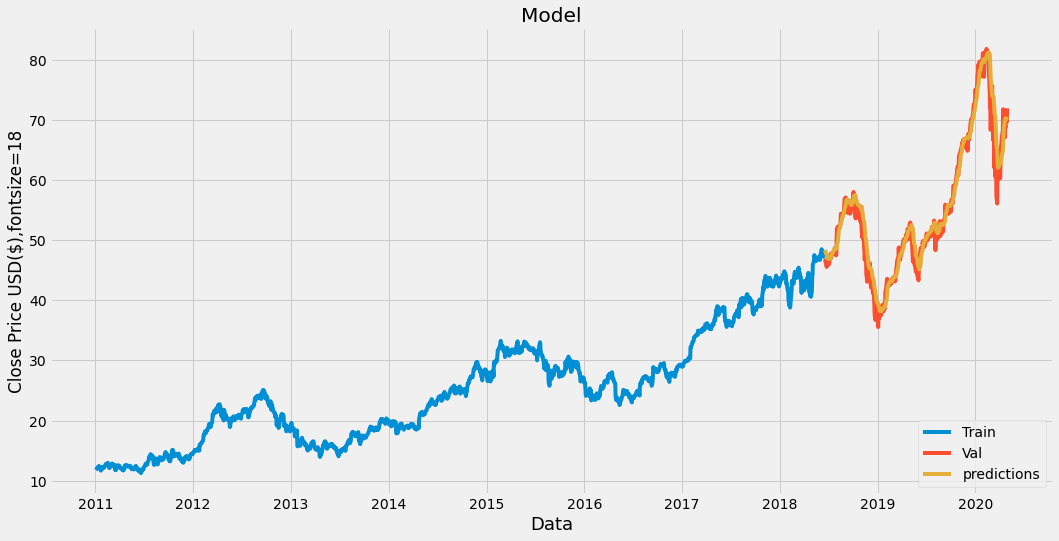

In [67]:
#plot a data 
train=data[:trainingdata]
valid=data[trainingdata:]
valid['predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close Price USD($),fontsize=18')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','Val','predictions'],loc='lower right')
plt.show()

In [68]:
#show the valid and predicted prices
valid

,Close,predictions
Date,,
2018-06-19,46.422501,48.369884
2018-06-20,46.625000,48.186909
2018-06-21,46.365002,48.000576
2018-06-22,46.230000,47.802860
2018-06-25,45.542500,47.605324
...,...,...
2020-04-23,68.757500,70.157532
2020-04-24,70.742500,70.102615
2020-04-27,70.792503,70.222954


In [69]:
#get the quota
apple=df
#create a dataframe
new=apple.filter(['Close'])
#get the last 60 day closing price nd cnvert to array
last60=new[-60:].values
#scale between 0 and 1
last60days=scale.transform(last60)
#create an list empty
xtest=[]
xtest.append(last60days)
#convert the xtestdata set to numpy
xtest=np.array(xtest)
#reshape kit
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
#get the predicted scaled price
predprice=model.predict(xtest)
#undo scalling
predprice=scale.inverse_transform(predprice)
print(predprice)

[[70.79388]]
